# Sandbox

## Introduction
This notebook is designed to be a playground for new features and new models. I'll try to not remove the output of plotting performance metrics of new models. Any new features that shoudl help imrpove performance will probably be first tested in a new model here. Also this notbook always for a quick qay to develop new features. 

### This notebook should be deleted before this project is considered finished




In [1]:
from stable_baselines3 import DQN
from snake.environment.game_environment import SnakeEnv, SnakeEnvNewStateRep
from snake.visualisation.state_visualisation import visualize_game_state

import time

In [8]:
import os

cwd = os.getcwd()

In [214]:
# train model and log metrics
env = SnakeEnv()
model_basic = DQN("MlpPolicy", env)


score_logger = ScoreLoggerCallback()
model_basic.learn(total_timesteps=100000, log_interval=4, callback=score_logger)
basic_metrics = score_logger.get_metrics()

In [215]:
# train model and log metrics
env = SnakeEnvNewStateRep()
model_new_state = DQN("MlpPolicy", env)


score_logger = ScoreLoggerCallback()
model_new_state.learn(total_timesteps=100000, log_interval=4, callback=score_logger)
new_state_metrics = score_logger.get_metrics()

In [216]:
# train model and log metrics
env = SnakeEnvNewReward()
model_new_reward = DQN("MlpPolicy", env)


score_logger = ScoreLoggerCallback()
model_new_reward.learn(total_timesteps=100000, log_interval=4, callback=score_logger)
new_reward_metrics = score_logger.get_metrics()

In [219]:
# train model and log metrics
env = SnakeEnvRandS()
model_new_reward_and_state = DQN("MlpPolicy", env)


score_logger = ScoreLoggerCallback()
model_new_reward_and_state.learn(total_timesteps=100000, log_interval=4, callback=score_logger)
new_reward_and_state_metrics = score_logger.get_metrics()

In [436]:
# train model and log metrics
env = SnakeEnvRandS()
model_new_reward_and_state_random_reset = DQN("MlpPolicy", env)


score_logger = ScoreLoggerCallback()
model_new_reward_and_state_random_reset.learn(total_timesteps=100000, log_interval=4, callback=score_logger)
new_reward_and_state_random_reset_metrics = score_logger.get_metrics()

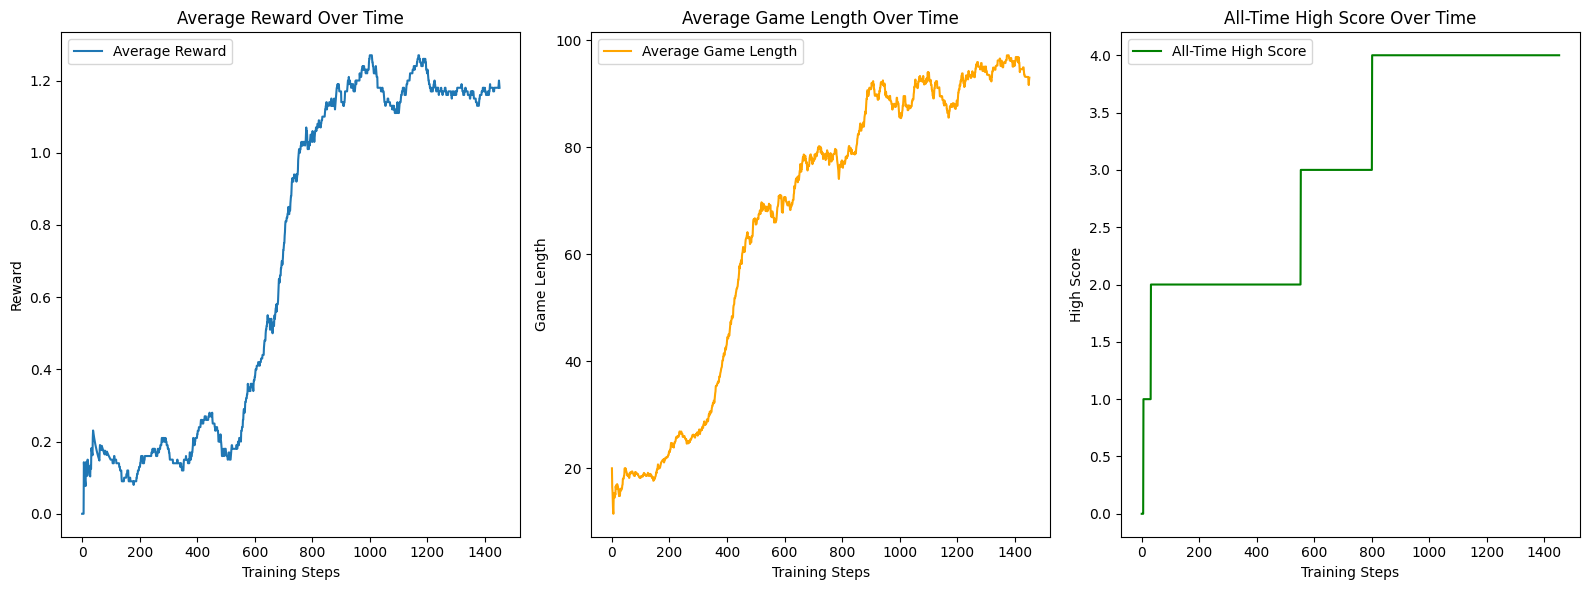

In [232]:
produce_plots(basic_metrics)

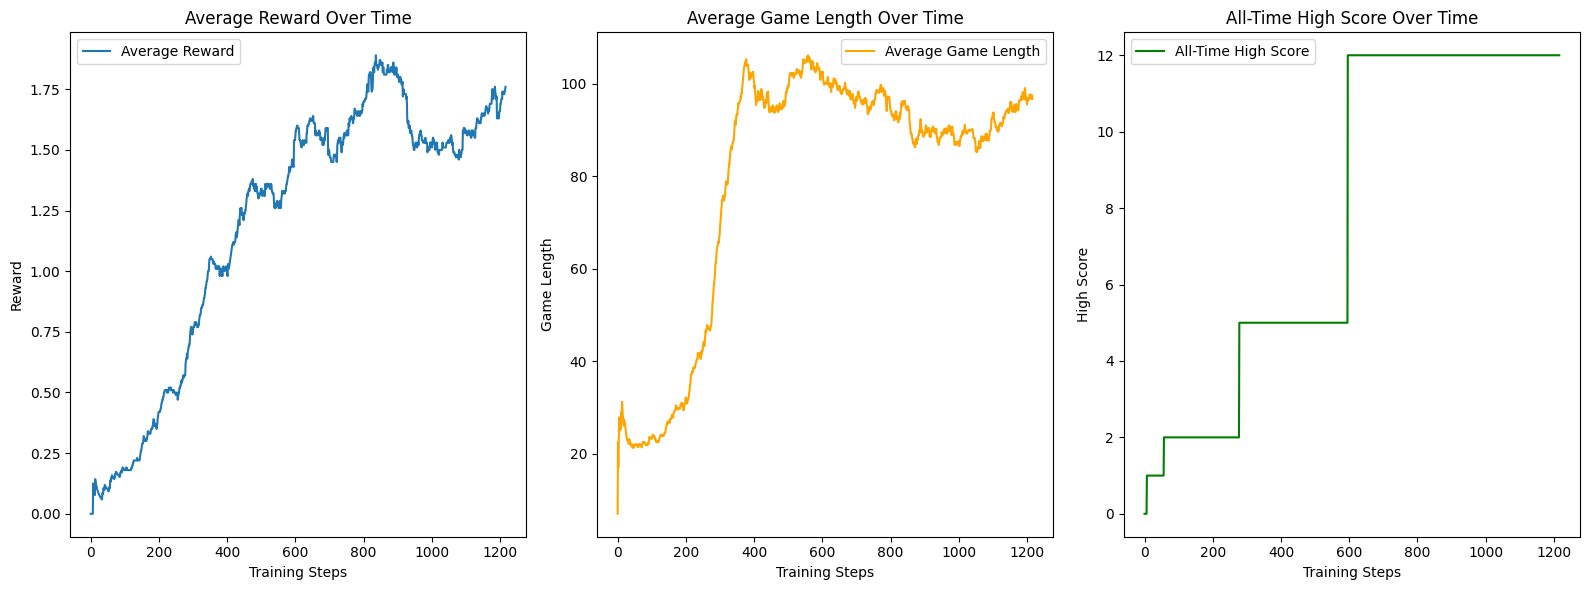

In [233]:
produce_plots(new_state_metrics)

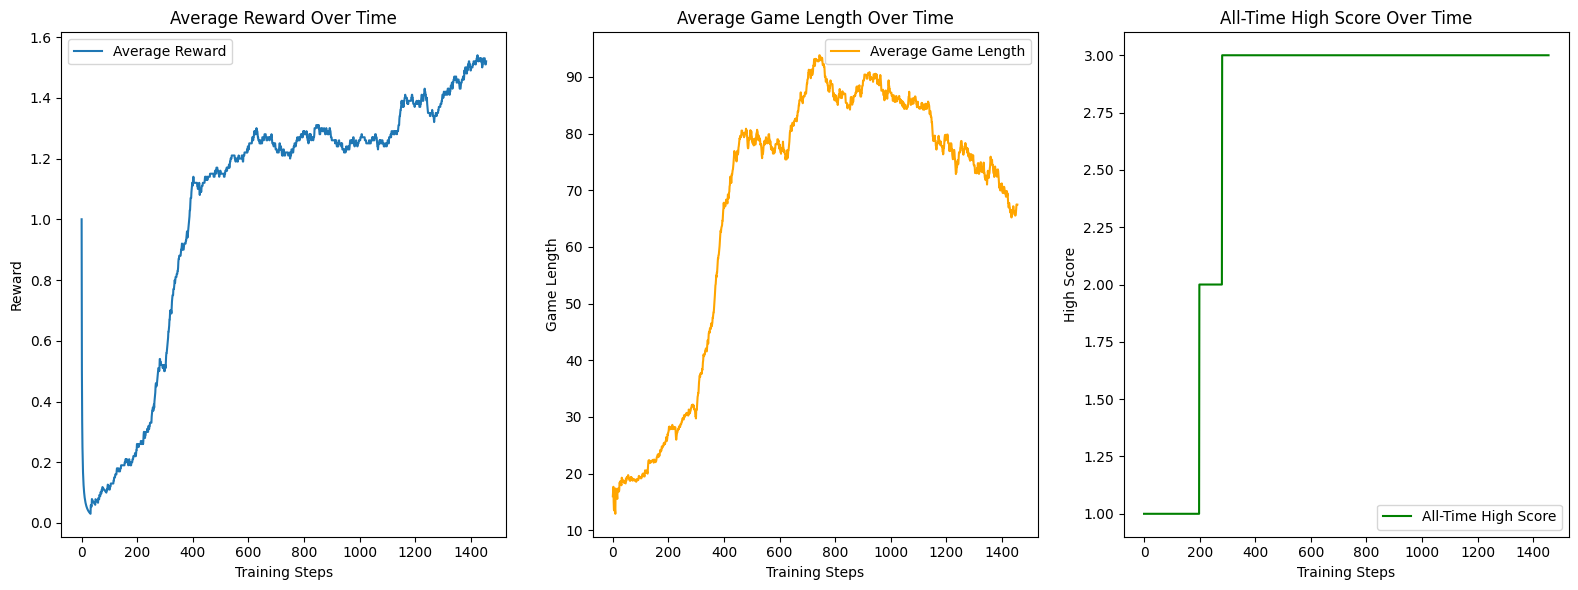

In [234]:
produce_plots(new_reward_metrics)

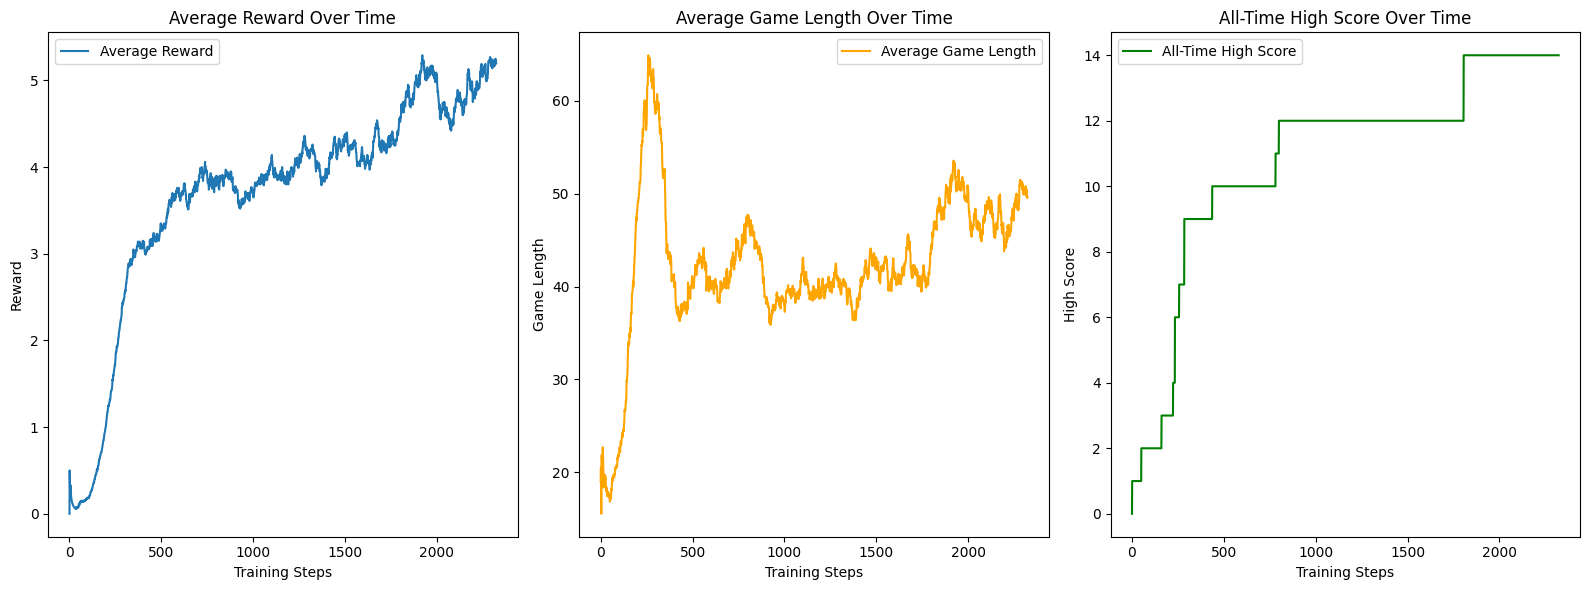

In [236]:
produce_plots(new_reward_and_state_metrics)

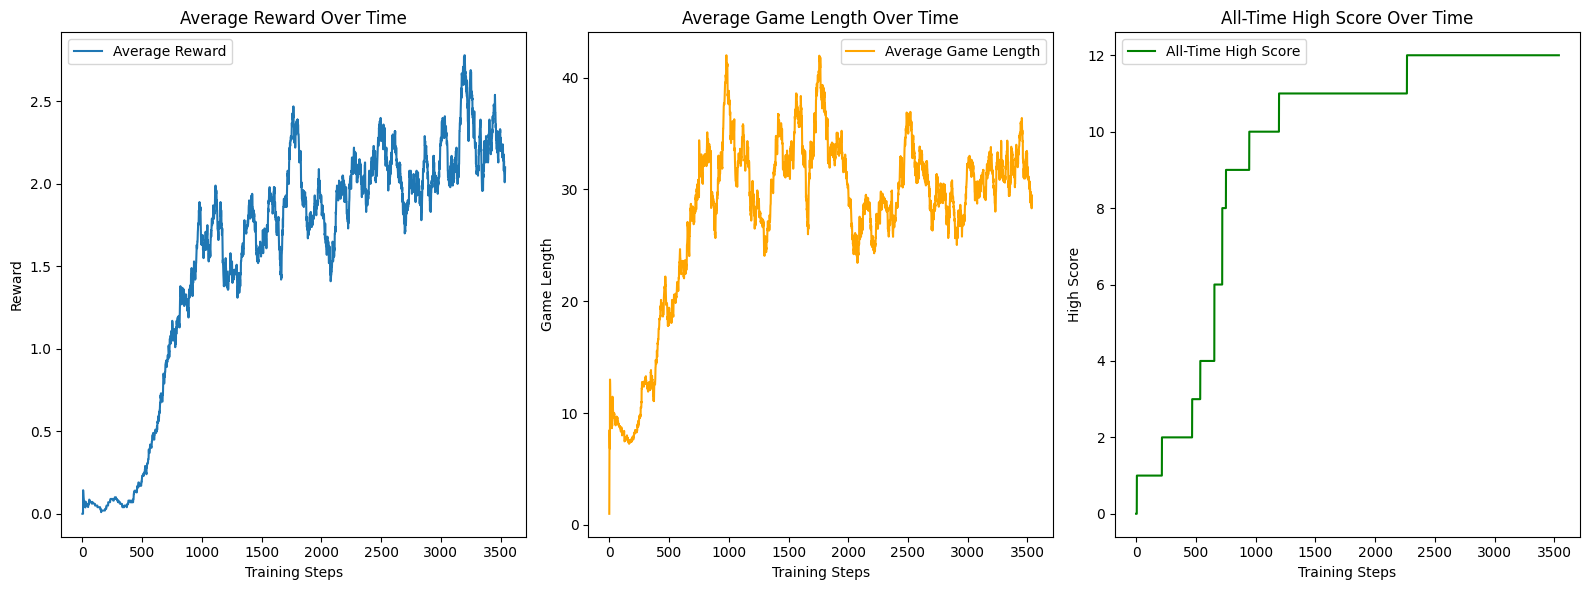

In [437]:
produce_plots(new_reward_and_state_random_reset_metrics)

In [448]:
env = SnakeEnvNewStateRep()

x = get_performance(model = model_new_reward_and_state_random_reset, env = env)


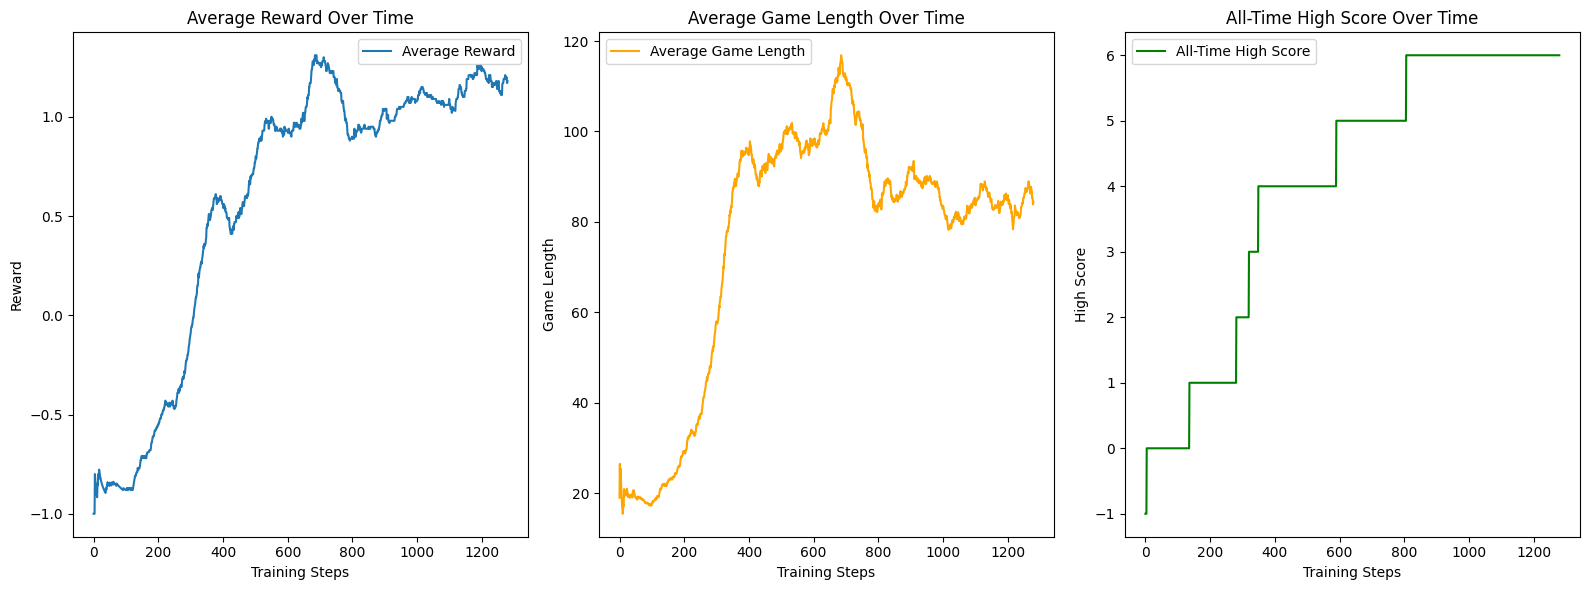

In [95]:
# plot performance metrics

import matplotlib.pyplot as plt

# Extract metrics
avg_rewards = [m["avg_reward"] for m in metrics]
avg_lengths = [m["avg_length"] for m in metrics]
high_scores = [m["all_time_high_score"] for m in metrics]

# Create plots
plt.figure(figsize=(16, 6))

# Average Reward Plot
plt.subplot(1, 3, 1)
plt.plot(avg_rewards, label="Average Reward")
plt.xlabel("Training Steps")
plt.ylabel("Reward")
plt.title("Average Reward Over Time")
plt.legend()

# Average Game Length Plot
plt.subplot(1, 3, 2)
plt.plot(avg_lengths, label="Average Game Length", color="orange")
plt.xlabel("Training Steps")
plt.ylabel("Game Length")
plt.title("Average Game Length Over Time")
plt.legend()

# All-Time High Score Plot
plt.subplot(1, 3, 3)
plt.plot(high_scores, label="All-Time High Score", color="green")
plt.xlabel("Training Steps")
plt.ylabel("High Score")
plt.title("All-Time High Score Over Time")
plt.legend()

plt.tight_layout()
plt.show()

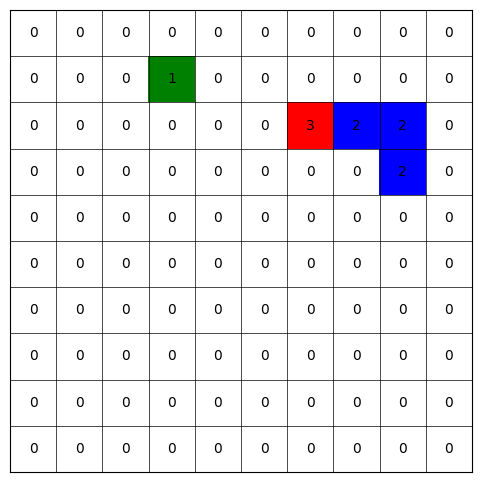

In [150]:
#model_path = os.path.join(cwd, "..", "models/dumb_agent") 

#model = DQN.load(model_path)

# Initialize environment and agent
env = SnakeEnv()

# Reset the environment
state, _ = env.reset()

# Loop through some steps
for _ in range(100):
    action = model_new_reward.predict(state, deterministic=True)[0]
    state, reward, done, _, _ = env.step(action)
    
    # Render the environment to visualize the state
    env.render(mode='human')
    
    if done:
        state, _ = env.reset()
        env.render(mode='human')

In [6]:
import numpy as np

# Array in the format [1, 2, 3, 4, 5, ..., 100]
x = list(range(1, 101))

# Convert to numpy array and reshape it into a 10x10 matrix
matrix = np.array(x).reshape(10, 10)

matrix = np.rot90(matrix, 3)

print(matrix.flatten())

[ 91  81  71  61  51  41  31  21  11   1  92  82  72  62  52  42  32  22
  12   2  93  83  73  63  53  43  33  23  13   3  94  84  74  64  54  44
  34  24  14   4  95  85  75  65  55  45  35  25  15   5  96  86  76  66
  56  46  36  26  16   6  97  87  77  67  57  47  37  27  17   7  98  88
  78  68  58  48  38  28  18   8  99  89  79  69  59  49  39  29  19   9
 100  90  80  70  60  50  40  30  20  10]


In [156]:
def _get_distance(pos1, pos2):
        
    x_diff = pos2 % 10 - pos1 % 10
    y_diff = np.floor(pos2 / 10) - np.floor(pos1 / 10) 
        
    return x_diff + y_diff

5.0

In [112]:
class SnakeEnvNewReward(SnakeEnv):

    def __init__(self):
        super(SnakeEnvNewReward, self).__init__()

    def step(self, action):
        """
        This method applies an action and returns the next state, reward, done, and any additional info.

        :param action: Action taken by the agent
        :return: tuple (next_state, reward, done, info)
        """
        
        self.state, reward, self.done, truncated, info = super().step(action)

        if self.done:
            new_reward = -1
        elif truncated:
            new_reward = 0
        elif reward == 1:
            new_reward = 1
        
        elif reward == 0:
            head = self.state.index(3)
            old_head = self._state_lag.index(3)
            food_loc = self._state_lag.index(1)
            
            head_food_dist = self._get_distance(head, food_loc)
            old_head_food_dist = self._get_distance(old_head, food_loc)
            
            
            if head_food_dist < old_head_food_dist:
                new_reward = 0.2
            elif head_food_dist > old_head_food_dist:
                new_reward = -0.2
            else:
                new_reward = 0
                print(head_food_dist)
                print(old_head_food_dist)
                print("====")
                print(head)
                print(old_head)
                print(food_loc)
                raise Exception("Something has gone wrong.")
    
        
        return self.state, new_reward, self.done, truncated, info

    
    def _get_distance(self, pos1, pos2):
        
        x_diff = abs(pos2 % 10 - pos1 % 10)
        y_diff = abs(np.floor(pos2 / 10) - np.floor(pos1 / 10) )
        
        return x_diff + y_diff
        
        

In [417]:
class SnakeEnvRandS(SnakeEnv):

    def __init__(self):
        super(SnakeEnvRandS, self).__init__()

    def step(self, action):
        """
        This method applies an action and returns the next state, reward, done, and any additional info.

        :param action: Action taken by the agent
        :return: tuple (next_state, reward, done, info)
        """

        self.state, reward, self.done, truncated, info = super().step(action)

        if self.done:
            new_reward = -1
        elif truncated:
            new_reward = 0
        elif reward == 1:
            new_reward = 1
        
        elif reward == 0:
            head = self.state.index(3)
            old_head = self._state_lag.index(3)
            food_loc = self._state_lag.index(1)
            
            head_food_dist = self._get_distance(head, food_loc)
            old_head_food_dist = self._get_distance(old_head, food_loc)
            
            
            if head_food_dist < old_head_food_dist:
                new_reward = 0.2
            elif head_food_dist > old_head_food_dist:
                new_reward = -0.2
            else:
                new_reward = 0
                print(head_food_dist)
                print(old_head_food_dist)
                print("====")
                print(head)
                print(old_head)
                print(food_loc)
                raise Exception("Something has gone wrong.")
    
        rotated_state = self._transform_state(self.state)
        
        return rotated_state, new_reward, self.done, truncated, info

    
    
    def reset(self, seed = None):
        """
        This method resets the environment to its initial state.
        :return: Initial state
        """
        super().reset(seed=seed)

        self.state, self._state_lag, self._snake = self._create_random_state()
        self.done = False

        # set the hidden variables appropriately
        self._time_since_food_eaten = 0
        self.score = 0
        
        return self.state, {}
    
    
    
    def _get_distance(self, pos1, pos2):
        
        x_diff = abs(pos2 % 10 - pos1 % 10)
        y_diff = abs(np.floor(pos2 / 10) - np.floor(pos1 / 10) )
        
        return x_diff + y_diff
    
    
    def _transform_state(self, state):
        """
        Turn the game state into a matrix and rotate it so the snake is always facing up then return it back to a list.

        :param state:
        :return:
        """

        matrix = np.array(state).reshape(10, 10)

        if self._snake[-1] - self._snake[-2] == 1:
            # snake going right
            return list(np.rot90(matrix, 1).flatten())
        elif self._snake[-1] - self._snake[-2] == 10:
            # snake going down
            return list(np.rot90(matrix, 2).flatten())
        elif self._snake[-1] - self._snake[-2] == -1:
            # snake going left
            return np.rot90(matrix, 3).flatten()
        elif self._snake[-1] - self._snake[-2] == -10:
            return list(matrix.flatten())
        
        
    def _get_valid_moves(self, x: int):
        if x < 0 or x > 99:
            raise Exception(f"x shoudl be from 0 to 99, got {x}")


        if x == 0:
            return [1, 10]
        elif x == 9:
            return [-1, 10]
        elif x == 90:
            return [1, -10]
        elif x == 99:
            return [-1, -10]
        elif np.floor(x/10) == 0:
            return [-1, 1, 10]
        elif np.floor(x/10) == 9:
            return [-1, 1, -10]
        elif x % 10 == 0: 
            return [1, 10, -10]
        elif x % 10 == 9:
            return [-1, 10, -10]
        else:
            return [-1, 10, -10, 1]
     

    def _create_random_state(self):
        """
        returns a random valid state. 

        """
        state = [0] * 100
        state_lag = [0] * 100

        snake = [np.random.choice(100)]
    
        tail_length = np.random.choice(8) + 2  

        for i in range(tail_length):
            done = False
            end = snake[-1]
            valid_moves = self._get_valid_moves(end)
            while not done:
                try:
                    proposal_move = np.random.choice(len(valid_moves))
                    proposal_loc = end + valid_moves[proposal_move]

                    if proposal_loc not in snake:
                        snake.append(proposal_loc)
                        done = True
                    else:
                        valid_moves.pop(proposal_move)


                except ValueError:
                    done = True

        for i in snake[:-1]:
            state[i] = 2
        state[snake[-1]] = 3
        
        for i in snake[:-2]:
            state_lag[i] = 2
        state_lag[snake[-2]] = 3
            

        done = False
        while not done:
            proposal_food_loc = np.random.choice(100)
            if proposal_food_loc not in snake:
                done = True
                state[proposal_food_loc] = 1
                state_lag[proposal_food_loc] = 1

        return state, state_lag, snake

    
    
    
    
        
        
        

In [425]:
snake = SnakeEnvRandS()

state, _ = snake.reset()

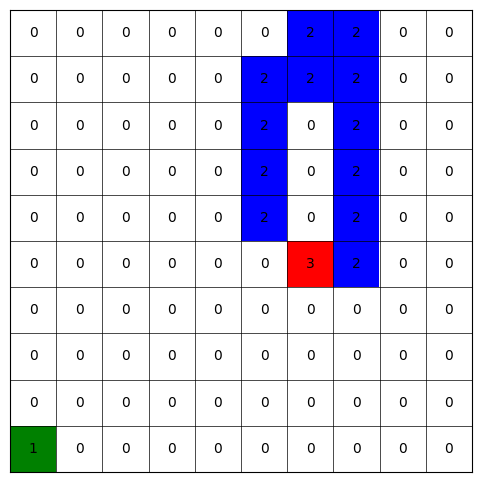

In [453]:
# Simulate 100 steps in the environment with rendering
#env = SnakeEnvRandS()

#obs, _ = env.reset()  # Reset the environment and get the initial observation
for step in range(100):
    # Use the model to predict the next action
    try:
        action, _states = model_new_reward_and_state.predict(obs, deterministic=True)
    except Exception as e:
        print("STATE IS ", obs)
        visualize_game_state(obs)
        raise e
    # Take the action in the environment
    obs, reward, done, truncated, info = env.step(action)
    if env._time_since_food_eaten > 20:
        truncated = True
    
    if done or truncated:
        obs, _ = env.reset()
    
    # Render the environment
    env.render()
    


In [390]:
def get_valid_moves(x: int):
    if x < 0 or x > 99:
        raise Exception(f"x shoudl be from 0 to 99, got {x}")

    
    if x == 0:
        return [1, 10]
    elif x == 9:
        return [-1, 10]
    elif x == 90:
        return [1, -10]
    elif x == 99:
        return [-1, -10]
    elif np.floor(x/10) == 0:
        return [-1, 1, 10]
    elif np.floor(x/10) == 9:
        return [-1, 1, -10]
    elif x % 10 == 0: 
        return [1, 10, -10]
    elif x % 10 == 9:
        return [-1, 10, -10]
    else:
        return [-1, 10, -10, 1]
     

def create_random_state():
    """
    returns a random valid state. 
    
    """
    state = [0] * 100
    
    snake = [np.random.choice(100)]
    
    tail_length = np.random.choice(23) + 2  
    
    for i in range(tail_length):
        done = False
        end = snake[-1]
        valid_moves = get_valid_moves(end)
        while not done:
            try:
                proposal_move = np.random.choice(len(valid_moves))
                proposal_loc = end + valid_moves[proposal_move]

                if proposal_loc not in snake:
                    snake.append(proposal_loc)
                    done = True
                else:
                    valid_moves.pop(proposal_move)

            
            except ValueError:
                done = True
                
    for i in snake[:-1]:
        state[i] = 2
    state[snake[-1]] = 3
    
    done = False
    while not done:
        proposal_food_loc = np.random.choice(100)
        if proposal_food_loc not in snake:
            done = True
            state[proposal_food_loc] = 1
    
    return state
    
    
    
    
    